In [1]:
# This is question of Mini Project 1 - Implementation Using Pandas and Numpy
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading data 
dataset = pd.read_excel('AirQuality.xlsx')
print(dataset.shape)
dataset.head()

(9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [9]:
intermediate = dataset.drop(['Date','Time','PT08.S1(CO)', 'NMHC(GT)','C6H6(GT)','PT08.S2(NMHC)','PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],axis=1)


In [11]:
intermediate.describe()

,CO(GT),NOx(GT)
count,9357.000000,9357.000000
mean,-34.207524,168.604200
std,77.657170,257.424561
min,-200.000000,-200.000000
25%,0.600000,50.000000
50%,1.500000,141.000000
75%,2.600000,284.200000
max,11.900000,1479.000000


In [24]:

finaldf = intermediate[intermediate['CO(GT)'] > 0]

finaldf = intermediate[intermediate['NOx(GT)'] > 0]


In [25]:
finaldf.describe()

,CO(GT),NOx(GT)
count,7261.000000,7261.000000
mean,2.205647,255.297879
std,1.458013,215.339899
min,0.100000,2.000000
25%,1.100000,103.000000
50%,1.900000,187.900000
75%,2.900000,339.100000
max,11.900000,1479.000000


In [83]:
correlation = finaldf.corr()
correlation

,CO(GT),NOx(GT)
CO(GT),1.000000,0.795054
NOx(GT),0.795054,1.000000


In [66]:
# Let's Run the normal program first
#initializing our inputs and outputs
import time
start1_time = time.time()

X = finaldf['NOx(GT)'].values
Y = finaldf['CO(GT)'].values

#mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

#total number of values
n = len(X)

#using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

#printing the coefficient
print(b1, b0)
end1_time = time.time()
print('Time taken to calculate Co-Efficients :: ', end1_time - start1_time)

0.005383111853613716 0.8313495660727277
Time taken to calculate Co-Efficients ::  0.012964487075805664


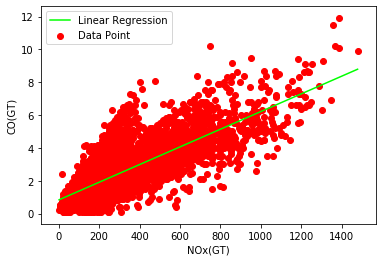

In [30]:
#plotting values 
x_max = np.max(X)
x_min = np.min(X)

#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('NOx(GT)')

#y-axis label
plt.ylabel('CO(GT)')

plt.legend()
plt.show()

In [67]:
# Calculating the Root Mean Square Error
import time
start2_time = time.time()

rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)

end2_time = time.time()
print('Time taken to calculate RMSE :: ', end2_time - start2_time)


0.8842812614811936
Time taken to calculate RMSE ::  0.012964010238647461


In [68]:
# Calculating the R2
import time
start2_time = time.time()

ss_t = 0
ss_r = 0
for i in range(n):
     y_pred=  b0 + b1* X[i]
     ss_t += (Y[i] - y_mean )**2
     ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

end2_time = time.time()
print('Time taken to calculate RMSE :: ', end2_time - start2_time)

0.6321102557999682
Time taken to calculate RMSE ::  0.018987178802490234


In [35]:
# This is the implementation using SkLearn
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [36]:
finaldf.isnull().any()

CO(GT)     False
NOx(GT)    False
dtype: bool

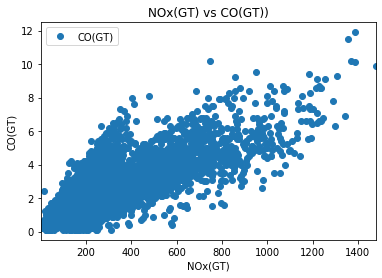

In [37]:
finaldf.plot(x='NOx(GT)', y='CO(GT)', style='o')  
plt.title('NOx(GT) vs CO(GT))')  
plt.xlabel('NOx(GT)')  
plt.ylabel('CO(GT)')  
plt.show()

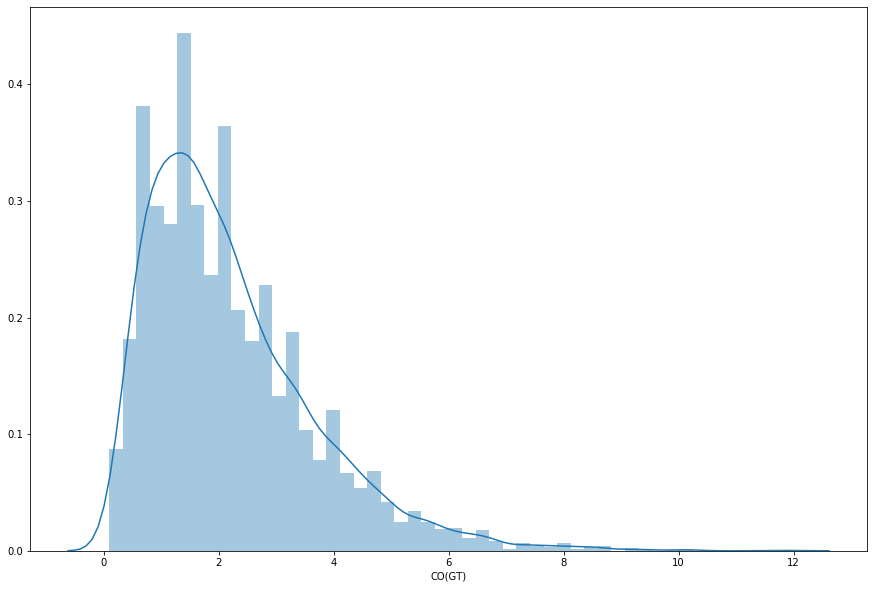

In [38]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(finaldf['CO(GT)'])

In [50]:
# Use the cleaned up data for X and Y
X = finaldf['NOx(GT)'].values.reshape(-1,1) 
y = finaldf['CO(GT)'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
import time
start2_time = time.time()
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)
end2_time = time.time()
print('Time taken to calculate Cofficients :: ', end2_time - start2_time)

[0.83123005]
[[0.00537264]]
Time taken to calculate Cofficients ::  0.0009975433349609375


In [75]:
y_pred = regressor.predict(X_test)

In [76]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2.6,1.967544
1,1.5,1.782188
2,4.8,2.679419
3,0.7,1.766607
4,1.4,1.556537
...,...,...
2174,5.4,3.447707
2175,1.8,1.572655
2176,1.0,1.691390
2177,0.7,1.142843


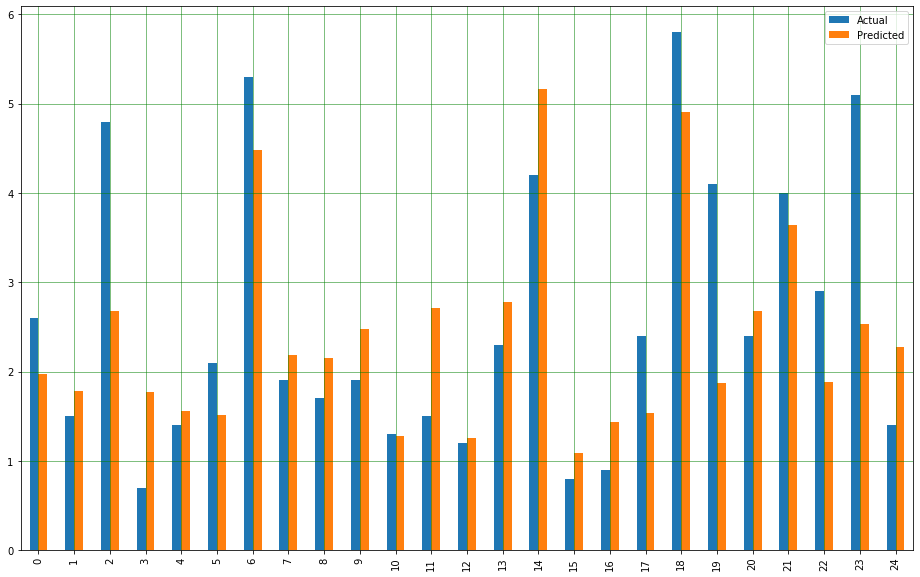

In [77]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

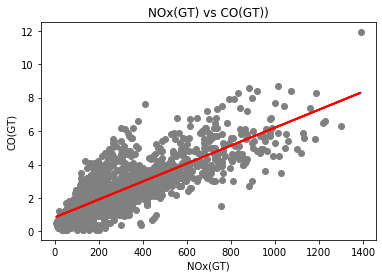

In [84]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('NOx(GT) vs CO(GT))')  
plt.xlabel('NOx(GT)')  
plt.ylabel('CO(GT)')
plt.show()

In [81]:
import time
start2_time = time.time()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
end2_time = time.time()
print('Time taken to calculate RMSE :: ', end2_time - start2_time)

Mean Absolute Error: 0.6557423872895113
Mean Squared Error: 0.7559010622580279
Root Mean Squared Error: 0.8694257083029164
Time taken to calculate RMSE ::  0.001971006393432617


In [82]:
#Calculate R2
from sklearn.metrics import r2_score
import time
start2_time = time.time()
print(r2_score(y_test,y_pred))
end2_time = time.time()
print('Time taken to calculate R2 :: ', end2_time - start2_time)

0.6472785397200214
Time taken to calculate R2 ::  0.000997781753540039


In [64]:
# Calculate Confusion Matrix in Python
#from sklearn.metrics import confusion_matrix
#confusion_matrix = confusion_matrix(y_test,y_pred)